In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('Car.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Handling missing values

We do not have any missing values, so no requirement for it.

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

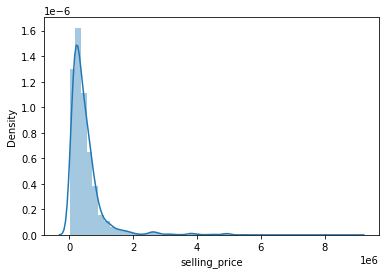

In [5]:
sns.distplot(df['selling_price'])

In [6]:
fuelTypes={"Petrol":1,"Diesel":0,"CNG":0,"LPG":1,"Electric":1}
df['fuel'].replace(fuelTypes,inplace=True)

In [7]:
df['fuel'].value_counts()

0    2193
1    2147
Name: fuel, dtype: int64

In [8]:
df.describe()

,year,selling_price,km_driven,fuel
count,4340.000000,4.340000e+03,4340.000000,4340.00000
mean,2013.090783,5.041273e+05,66215.777419,0.49470
std,4.215344,5.785487e+05,46644.102194,0.50003
min,1992.000000,2.000000e+04,1.000000,0.00000
25%,2011.000000,2.087498e+05,35000.000000,0.00000
50%,2014.000000,3.500000e+05,60000.000000,0.00000
75%,2016.000000,6.000000e+05,90000.000000,1.00000
max,2020.000000,8.900000e+06,806599.000000,1.00000


<AxesSubplot:>

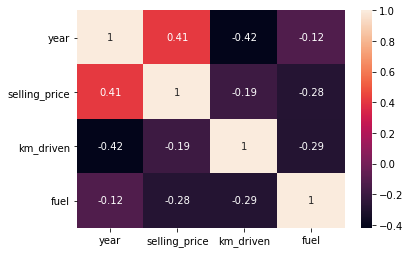

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df['Age']=df['year'].apply(lambda x: 2021-x)

In [11]:
df.corr()

,year,selling_price,km_driven,fuel,Age
year,1.000000,0.413922,-0.419688,-0.123108,-1.000000
selling_price,0.413922,1.000000,-0.192289,-0.275722,-0.413922
km_driven,-0.419688,-0.192289,1.000000,-0.285806,0.419688
fuel,-0.123108,-0.275722,-0.285806,1.000000,0.123108
Age,-1.000000,-0.413922,0.419688,0.123108,1.000000


In [12]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [13]:
def replaceOwner(owner):
    owner=owner.split(" ")
    if owner[0]=="First":
        return 1
    else:
        return 0

In [14]:
d=df.sample(5)
d

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
140,Tata Indica Vista Aqua TDI BSIII,2011,120000,70000,0,Individual,Manual,First Owner,10
2060,Tata New Safari Dicor EX 4X2 BS IV,2012,280000,110000,0,Individual,Manual,Fourth & Above Owner,9
4094,Ford EcoSport 1.5 Petrol Titanium Plus AT BSIV,2015,750000,48238,1,Trustmark Dealer,Automatic,First Owner,6
904,Maruti Swift ZXI BSIV,2016,670000,7104,1,Trustmark Dealer,Manual,First Owner,5
1834,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,0,Dealer,Automatic,First Owner,3


In [15]:
d['owner'].apply(replaceOwner)

140     1
2060    0
4094    1
904     1
1834    1
Name: owner, dtype: int64

In [16]:
df['First_Owner']=df['owner'].apply(replaceOwner)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age,First_Owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,Manual,First Owner,14,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,Manual,First Owner,14,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,Individual,Manual,First Owner,9,1
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,Manual,First Owner,4,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,Individual,Manual,Second Owner,7,0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,Individual,Manual,Second Owner,7,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,Individual,Manual,Second Owner,7,0
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,Manual,Second Owner,12,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,Individual,Manual,First Owner,5,1


In [17]:
df['First_Owner'].value_counts()

1    2832
0    1508
Name: First_Owner, dtype: int64

In [18]:
df.corr()

,year,selling_price,km_driven,fuel,Age,First_Owner
year,1.000000,0.413922,-0.419688,-0.123108,-1.000000,0.438897
selling_price,0.413922,1.000000,-0.192289,-0.275722,-0.413922,0.223889
km_driven,-0.419688,-0.192289,1.000000,-0.285806,0.419688,-0.299731
fuel,-0.123108,-0.275722,-0.285806,1.000000,0.123108,0.005815
Age,-1.000000,-0.413922,0.419688,0.123108,1.000000,-0.438897
First_Owner,0.438897,0.223889,-0.299731,0.005815,-0.438897,1.000000


In [19]:
df['transmission'].value_counts()
df['transmission'].replace({"Manual":1,"Automatic":0},inplace=True)

In [20]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Age,First_Owner
0,Maruti 800 AC,2007,60000,70000,1,Individual,1,First Owner,14,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,Individual,1,First Owner,14,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,Individual,1,First Owner,9,1
3,Datsun RediGO T Option,2017,250000,46000,1,Individual,1,First Owner,4,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,Individual,1,Second Owner,7,0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,Individual,1,Second Owner,7,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,Individual,1,Second Owner,7,0
4337,Maruti 800 AC BSIII,2009,110000,83000,1,Individual,1,Second Owner,12,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,Individual,1,First Owner,5,1


In [21]:
df.drop(columns=['year','owner'],inplace=True)

In [22]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner
0,Maruti 800 AC,60000,70000,1,Individual,1,14,1
1,Maruti Wagon R LXI Minor,135000,50000,1,Individual,1,14,1
2,Hyundai Verna 1.6 SX,600000,100000,0,Individual,1,9,1
3,Datsun RediGO T Option,250000,46000,1,Individual,1,4,1
4,Honda Amaze VX i-DTEC,450000,141000,0,Individual,1,7,0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,0,Individual,1,7,0
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,0,Individual,1,7,0
4337,Maruti 800 AC BSIII,110000,83000,1,Individual,1,12,0
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,0,Individual,1,5,1


In [23]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [24]:
sellers={"Individual":1,"Dealer":0,"Trustmark Dealer":0}
df['seller_type'].replace(sellers,inplace=True)

In [25]:
df['seller_type'].value_counts()

1    3244
0    1096
Name: seller_type, dtype: int64

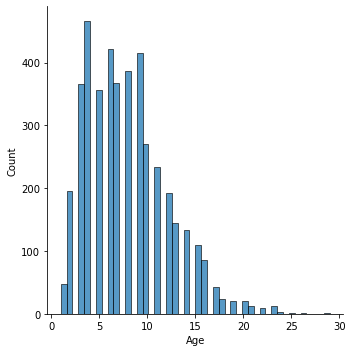

In [26]:
sns.displot(df['Age'])

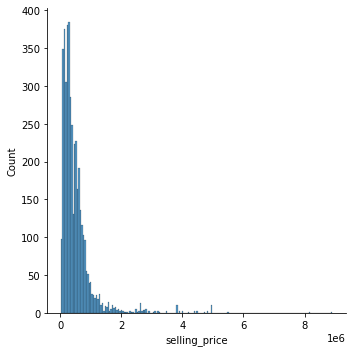

In [27]:
sns.displot(df['selling_price'])

In [28]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner
selling_price,1.000000,-0.192289,-0.275722,-0.236798,-0.530205,-0.413922,0.223889
km_driven,-0.192289,1.000000,-0.285806,0.182663,0.120226,0.419688,-0.299731
fuel,-0.275722,-0.285806,1.000000,0.034147,0.041845,0.123108,0.005815
seller_type,-0.236798,0.182663,0.034147,1.000000,0.214163,0.173703,-0.252628
transmission,-0.530205,0.120226,0.041845,0.214163,1.000000,0.143800,-0.090121
Age,-0.413922,0.419688,0.123108,0.173703,0.143800,1.000000,-0.438897
First_Owner,0.223889,-0.299731,0.005815,-0.252628,-0.090121,-0.438897,1.000000


In [29]:
def getCarBrand(name):
    name=name.split(" ")[0]
    return name

In [30]:
df['brand']=df['name'].apply(getCarBrand)

In [31]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner,brand
0,Maruti 800 AC,60000,70000,1,1,1,14,1,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,1,1,1,14,1,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,0,1,1,9,1,Hyundai
3,Datsun RediGO T Option,250000,46000,1,1,1,4,1,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,0,1,1,7,0,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,0,1,1,7,0,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,0,1,1,7,0,Hyundai
4337,Maruti 800 AC BSIII,110000,83000,1,1,1,12,0,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,0,1,1,5,1,Hyundai


In [32]:
df['brand'].value_counts()


Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Daewoo              1
Kia                 1
Force               1
Isuzu               1
Name: brand, dtype: int64

In [33]:
highEndBrands=['Audi','BMW','Mercedes-Benz','Mitsubishi','Jaguar','Land','Volvo','Jeep','OpelCorsa']

def convertBrand(brand):
    if(brand in highEndBrands):
        return 1
    else:
        return 0

In [34]:
df['high_end']=df['brand'].apply(convertBrand)

In [35]:
df[df['high_end']==1]

,name,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner,brand,high_end
29,Jaguar XF 2.2 Litre Luxury,1964999,28000,0,0,0,7,1,Jaguar,1
30,Mercedes-Benz New C-Class 220 CDI AT,1425000,59000,0,0,0,8,1,Mercedes-Benz,1
32,Audi Q5 2.0 TDI,1190000,175900,0,0,0,10,1,Audi,1
35,Audi A6 2.0 TDI Design Edition,1735000,50000,0,0,0,8,1,Audi,1
36,Mercedes-Benz New C-Class C 220 CDI Avantgarde,1375000,33800,0,0,0,9,0,Mercedes-Benz,1
...,...,...,...,...,...,...,...,...,...,...
4047,Volvo XC 90 D5 Inscription BSIV,4500000,80000,0,1,0,4,1,Volvo,1
4163,Audi Q3 2.0 TDI Quattro Premium Plus,1400000,118000,0,1,0,9,0,Audi,1
4300,Mercedes-Benz E-Class E250 CDI Elegance,999000,49600,0,0,0,10,1,Mercedes-Benz,1
4302,BMW 7 Series 730Ld,1050000,30000,0,0,0,15,1,BMW,1


In [36]:
df.drop(columns=['name','brand'],inplace=True)

In [37]:
df

,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner,high_end
0,60000,70000,1,1,1,14,1,0
1,135000,50000,1,1,1,14,1,0
2,600000,100000,0,1,1,9,1,0
3,250000,46000,1,1,1,4,1,0
4,450000,141000,0,1,1,7,0,0
...,...,...,...,...,...,...,...,...
4335,409999,80000,0,1,1,7,0,0
4336,409999,80000,0,1,1,7,0,0
4337,110000,83000,1,1,1,12,0,0
4338,865000,90000,0,1,1,5,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   selling_price  4340 non-null   int64
 1   km_driven      4340 non-null   int64
 2   fuel           4340 non-null   int64
 3   seller_type    4340 non-null   int64
 4   transmission   4340 non-null   int64
 5   Age            4340 non-null   int64
 6   First_Owner    4340 non-null   int64
 7   high_end       4340 non-null   int64
dtypes: int64(8)
memory usage: 271.4 KB


In [39]:
df.describe()

,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner,high_end
count,4.340000e+03,4340.000000,4340.00000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,5.041273e+05,66215.777419,0.49470,0.747465,0.896774,7.909217,0.652535,0.036866
std,5.785487e+05,46644.102194,0.50003,0.434516,0.304289,4.215344,0.476220,0.188455
min,2.000000e+04,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.087498e+05,35000.000000,0.00000,0.000000,1.000000,5.000000,0.000000,0.000000
50%,3.500000e+05,60000.000000,0.00000,1.000000,1.000000,7.000000,1.000000,0.000000
75%,6.000000e+05,90000.000000,1.00000,1.000000,1.000000,10.000000,1.000000,0.000000
max,8.900000e+06,806599.000000,1.00000,1.000000,1.000000,29.000000,1.000000,1.000000


In [40]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,Age,First_Owner,high_end
selling_price,1.000000,-0.192289,-0.275722,-0.236798,-0.530205,-0.413922,0.223889,0.629459
km_driven,-0.192289,1.000000,-0.285806,0.182663,0.120226,0.419688,-0.299731,-0.033317
fuel,-0.275722,-0.285806,1.000000,0.034147,0.041845,0.123108,0.005815,-0.137332
seller_type,-0.236798,0.182663,0.034147,1.000000,0.214163,0.173703,-0.252628,-0.164912
transmission,-0.530205,0.120226,0.041845,0.214163,1.000000,0.143800,-0.090121,-0.528431
Age,-0.413922,0.419688,0.123108,0.173703,0.143800,1.000000,-0.438897,-0.033791
First_Owner,0.223889,-0.299731,0.005815,-0.252628,-0.090121,-0.438897,1.000000,0.047751
high_end,0.629459,-0.033317,-0.137332,-0.164912,-0.528431,-0.033791,0.047751,1.000000


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression(normalize=True)

In [43]:
from sklearn.model_selection import train_test_split

In [71]:
X=['transmission','Age']
y='selling_price'
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['selling_price','km_driven','fuel']), df[y], test_size=0.2, random_state=42)

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [73]:
def getErrorMetrics(pred,y):
    print(f"MAE:{mean_absolute_error(pred,y)}\n")
    print(f"MSE:{mean_squared_error(pred,y)}\n")
    print(f"R2 Score:{r2_score(pred,y)}\n")

In [74]:
def makePredictions(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    getErrorMetrics(prediction,y_test)

In [75]:
makePredictions(lr,X_train,y_train,X_test,y_test)

MAE:213790.427632347

MSE:159863246201.0807

R2 Score:0.09954317189752326

